In [1]:
import gps
import wget
import os
import numpy as np 
import time
import json
import sys
import math
from datetime import datetime, timedelta, date
from itertools import compress
from random import randint
import urllib2

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def output (r_d, r_m, r_y):
    d = datetime(r_y,r_m,r_d);
    r_extra =randint(0,6)
    r_day = r_d + r_extra
    print d.date
    ms = gps.meta_search();
    e = gps.event("Random");
    e.add_date(mins=00,hh=00,dd=r_day,mm=r_m,yy=r_y);
    e.add_data("Geographic_Latitude", 50.67);
    e.add_data("Geographic_Longitude",17.94);

    start_date = datetime(r_y,r_m,r_d);
    end_date = datetime(r_y,r_m,r_d);

    ms.load_data(start_date,end_date);
    ms.apply_search(e, 7);
    # ms.extend_time_window(0.25);

    output_data = ms.get_selected_data("decimal_day")
    
    return output_data

In [3]:
def day_in_year(r_d, r_m, r_y):
    year = '20'+str(r_y).zfill(2)
    month = str(r_m).zfill(2)
    day = str(r_d).zfill(2)

    date = datetime.date(int(year), int(month), int(day))
    return  date.strftime('%j')

In [4]:
count = 0
while count < 1:
    r_d = randint(1,31)
    r_m = randint(1,12)
    r_y = randint(1,16)
    try:
        out = output(r_d, r_m, r_y)
        count += 1
        print count
    except(IndexError, ValueError):
        print ("Error"), count, r_d, r_m, r_y
        continue

<built-in method date of datetime.datetime object at 0x7f2c4a803b98>

Check the filename as the returned file appears too small
... deleting file
Error 0 11 10 11
<built-in method date of datetime.datetime object at 0x7f2c7007a508>
Error 0 27 5 12
<built-in method date of datetime.datetime object at 0x7f2c4a8033c8>

Check the filename as the returned file appears too small
... deleting file
Error 0 16 1 12
<built-in method date of datetime.datetime object at 0x7f2c7007a508>
Error 0 26 9 12
<built-in method date of datetime.datetime object at 0x7f2c4a803bc0>

Check the filename as the returned file appears too small
... deleting file
Error 0 13 7 2
<built-in method date of datetime.datetime object at 0x7f2c7007a508>

Check the filename as the returned file appears too small
... deleting file
Error 0 6 1 6
<built-in method date of datetime.datetime object at 0x7f2c4a8039b8>

Check the filename as the returned file appears too small
... deleting file
Error 0 4 8 6
<built-in method date of


Reading file ns65_140216_v1.03.ascii

Reading file ns66_140209_v1.03.ascii

Min Latitude         :  -55.1442
Max Latitude         :  55.1442
Min Longitude         :  1.3967
Max Longitude         :  359.5799
Min Radius         :  4.165846
Max Radius         :  4.172125
Min L Shell         :  4.160583
Max L Shell        :  999.0
Min Day            :  40.002755
Max Day            :  46.999977
Year             :  2014.0


Reading file ns66_140216_v1.03.ascii

Check the filename as the returned file appears too small
... deleting file

Check the filename as the returned file appears too small
... deleting file

Check the filename as the returned file appears too small
... deleting file

Check the filename as the returned file appears too small
... deleting file

Check the filename as the returned file appears too small
... deleting file

Check the filename as the returned file appears too small
... deleting file

Check the filename as the returned file appears too small
... deleting file
1

In [5]:
for fn in out.keys():
    print fn

ns55_140209
ns59_140216
ns62_140209
ns54_140209
ns60_140216
ns60_140209
ns66_140209
ns48_140216
ns41_140209
ns65_140216
ns58_140209
ns53_140216
ns57_140216
ns62_140216
ns63_140209
ns41_140216
ns54_140216
ns55_140216
ns59_140209
ns48_140209
ns56_140216
ns66_140216
ns53_140209
ns56_140209
ns58_140216
ns61_140209
ns65_140209
ns63_140216
ns61_140216
ns57_140209


In [12]:
catalog = open("catalog.json", "w+")
#query&format=geojson
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query&format=geojson&starttime=2014-02-08&endtime=2014-02-23&minmagnitude=6'
#&minlatitude=2&maxlatitude=5&minlongitude=90&maxlongitude-100'
fh = urllib2.urlopen(url)
data=fh.read()
catalog.write(data)
catalog.close()

catalog = json.load(open('catalog.json'))

erq = {}
xxx = catalog['features']
for i in range(len(xxx)):
    title = catalog['features'][i]['properties']['title']
    location = catalog['features'][i]['geometry']['coordinates'][:2]
    erq.update({title: location})
    print title
    print location

M 6.5 - 172km NNE of Bathsheba, Barbados
[-58.9272, 14.6682]
M 6.9 - 272km ESE of Hotan, China
[82.5864, 35.9053]
M 6.0 - 122km WNW of Panguna, Papua New Guinea
[154.435, -5.9651]


In [15]:
reject_list = []
for filename in out.keys():
    latitude = out[filename]['Geographic_Latitude']
    longitude = out[filename]['Geographic_Longitude']
    day = out[filename]['decimal_day']
    for title in erq:
        #print filename, title
        for i in range(len(day)):
            del_lt = latitude[i][0] - erq[title][1]
            del_ln = longitude[i][0] - erq[title][0]
            if abs(del_lt) < 10 and abs(del_ln) < 10:
                if filename not in reject_list:
                    reject_list.append(filename)
                break

In [16]:
file_list = []
#print len(reject_list)
for filename in out.keys():
    if filename not in reject_list:
        file_list.append(filename)
new_list = filter(lambda k: 'ns54' in k, file_list)
print new_list

['ns54_140209', 'ns54_140216']


In [17]:
for fn in new_list:
    for i in range(len(out[fn]['dropped_data'])):
        if out[fn]['dropped_data'][i] == 1:
            np.delete(out[fn], i , 0)

    print len(out[fn]['rate_proton_measured'])

2520
1080


====================ns54_140209


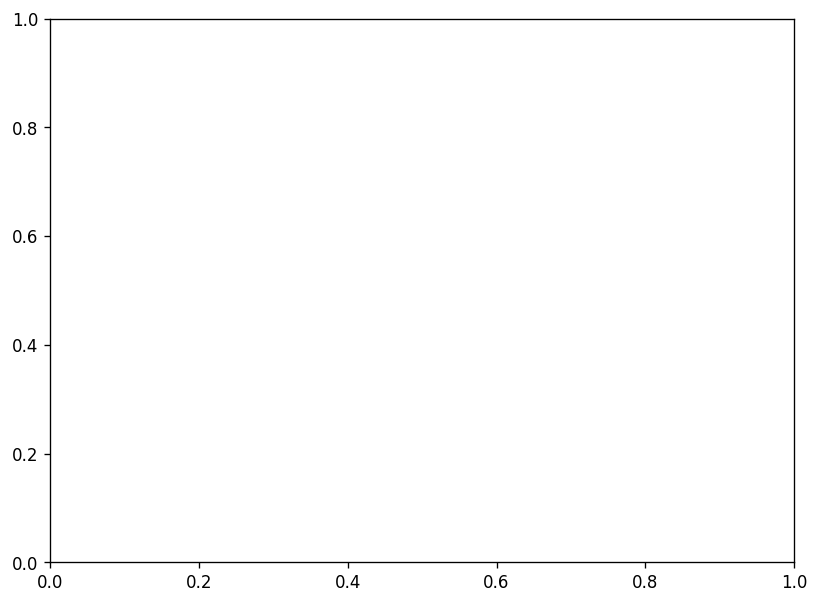

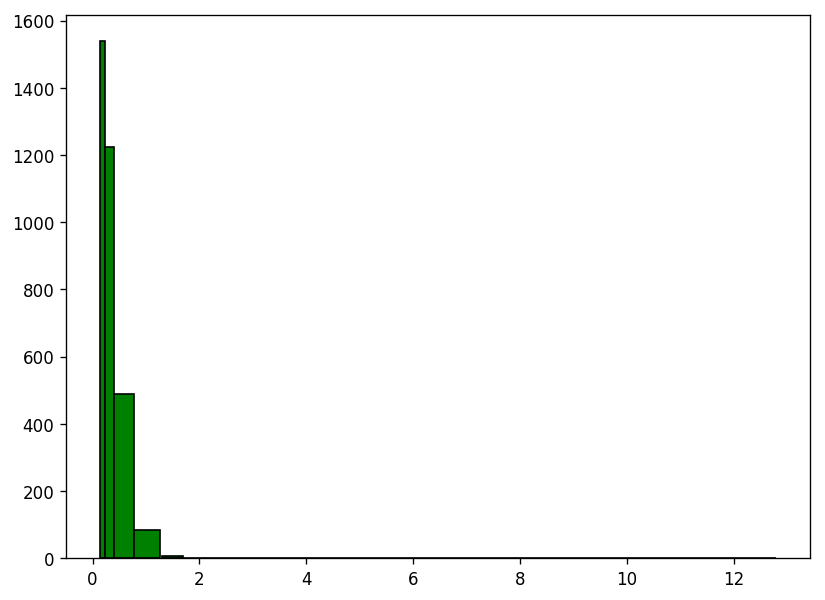

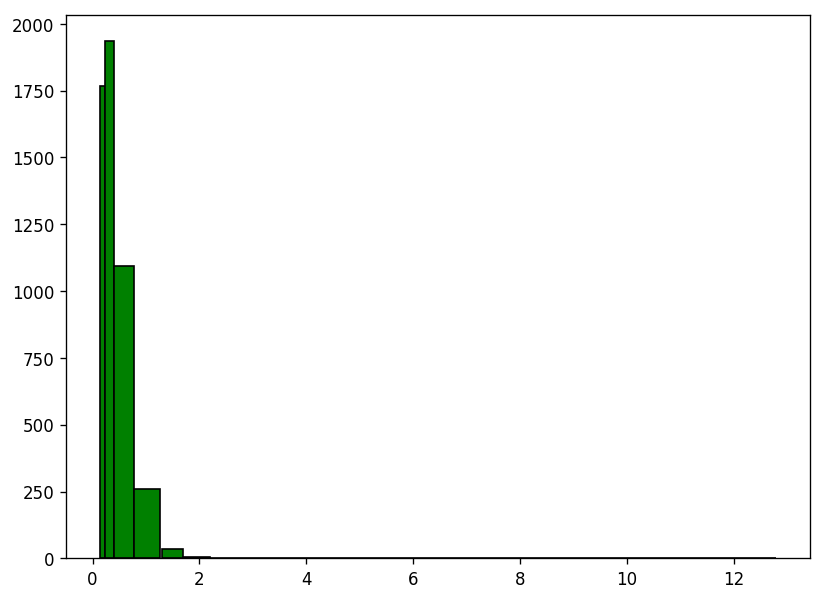

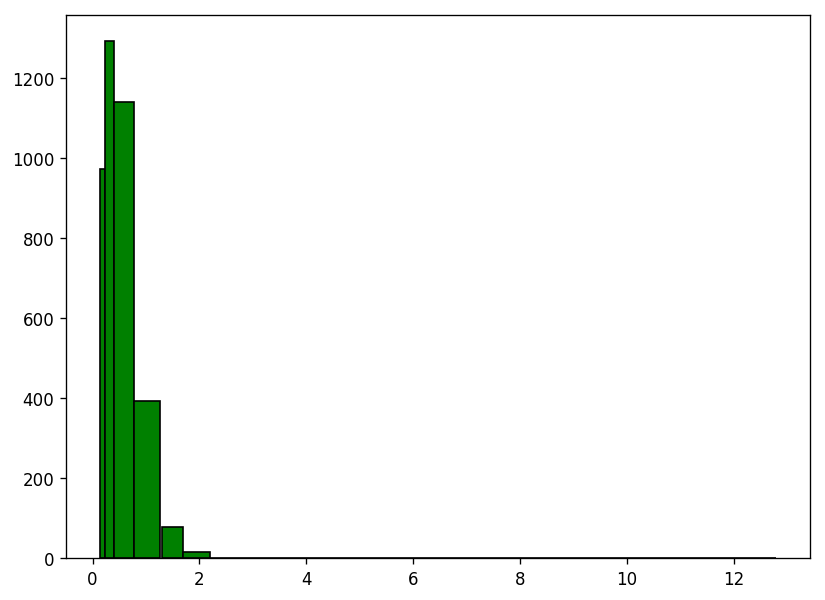

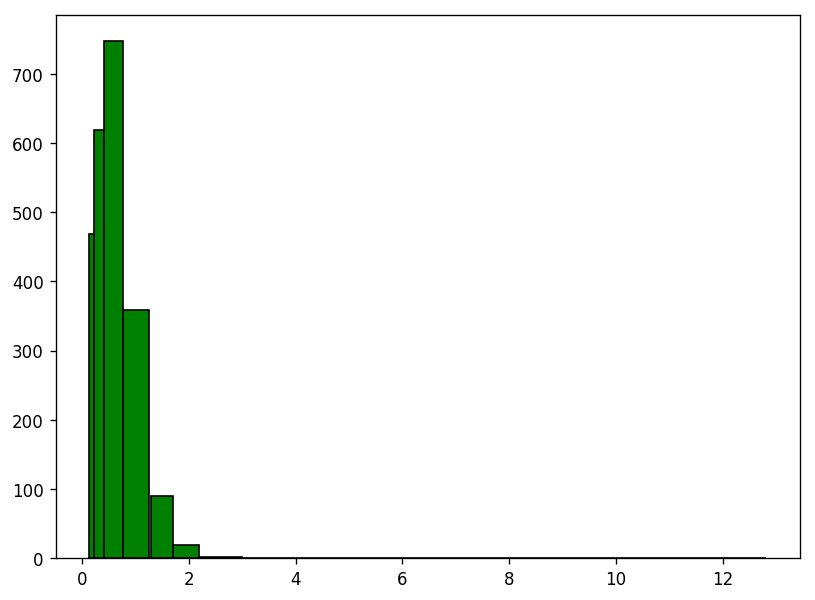

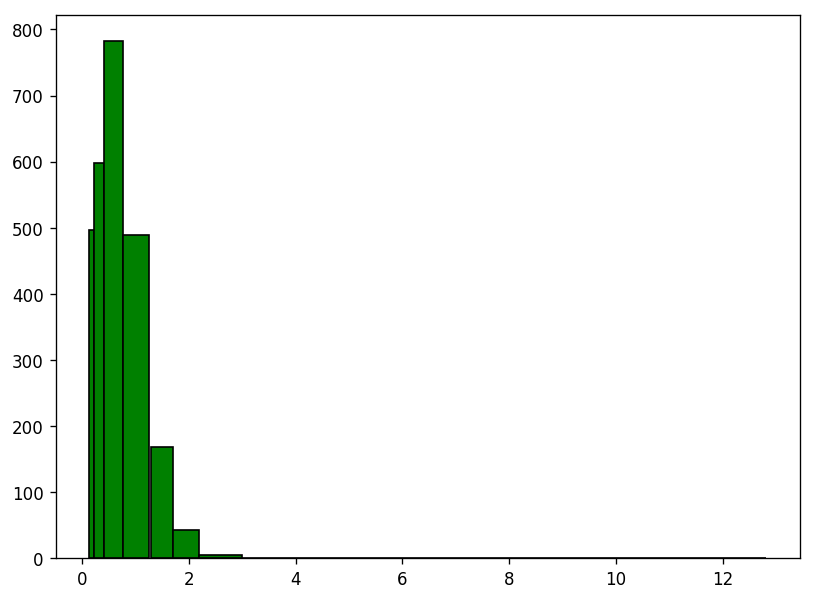

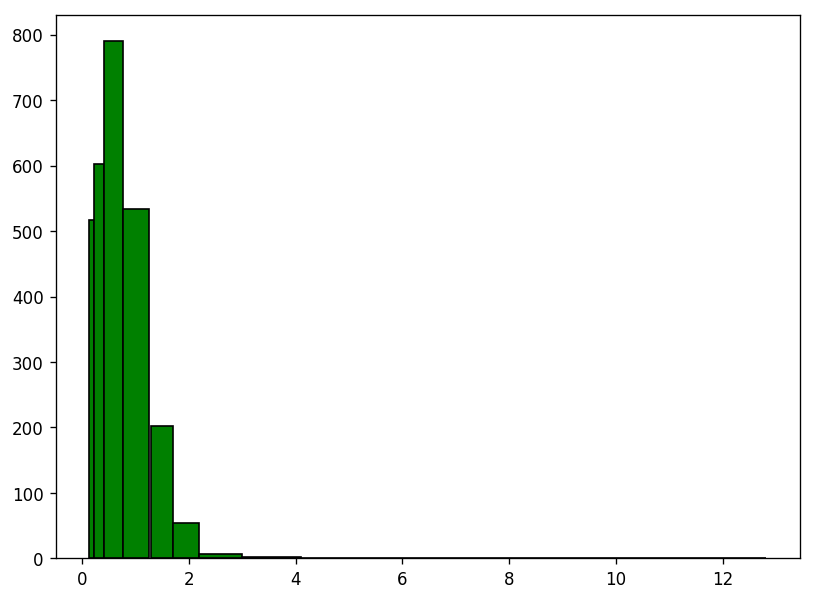

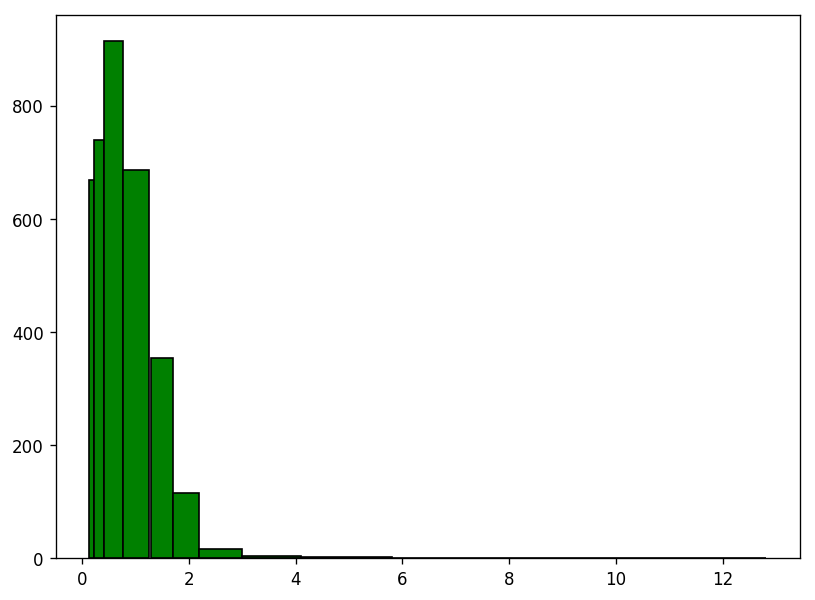

====================ns54_140216


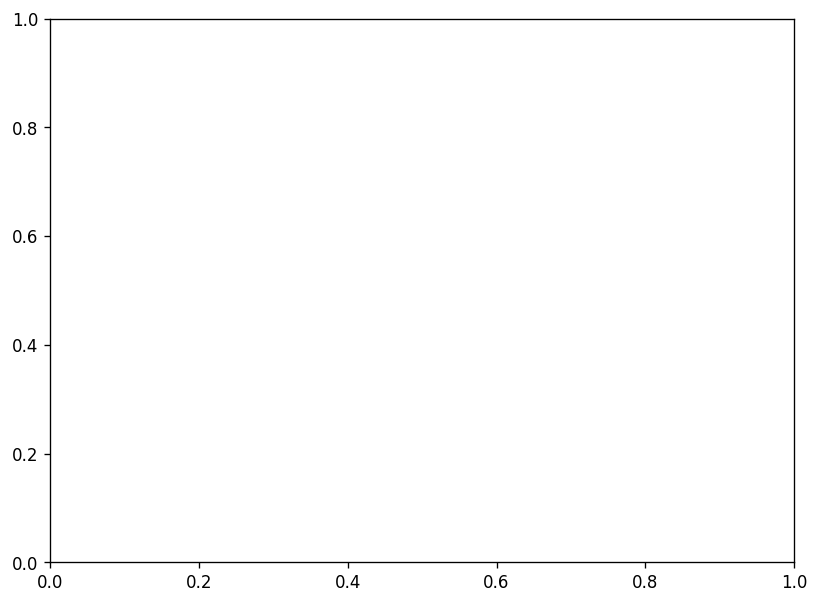

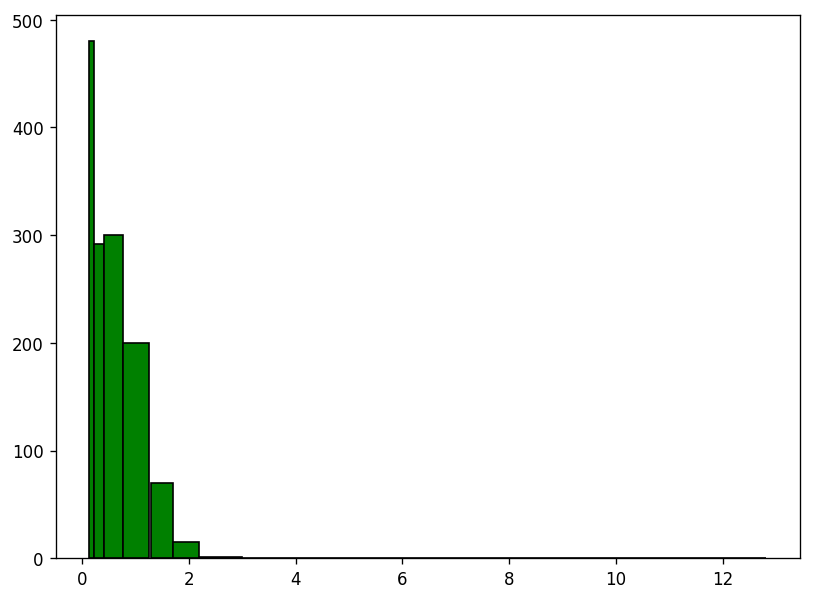

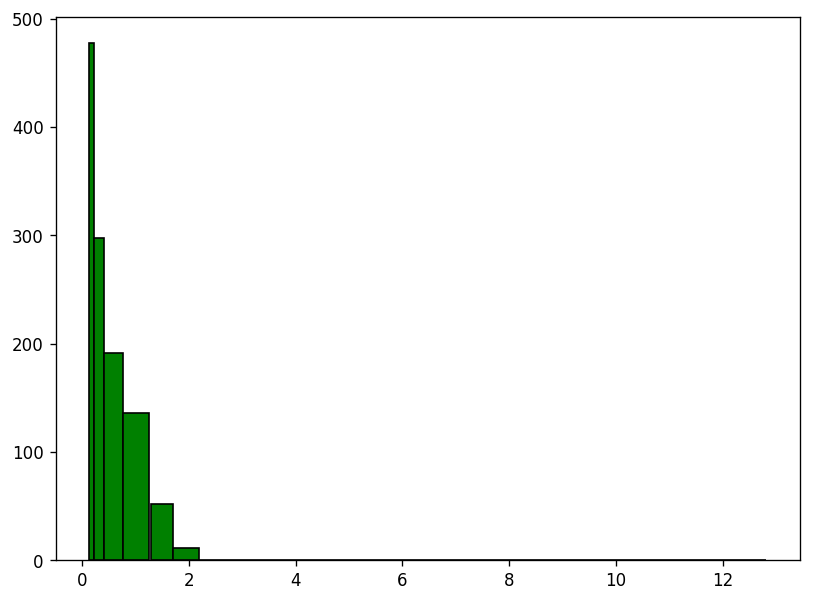

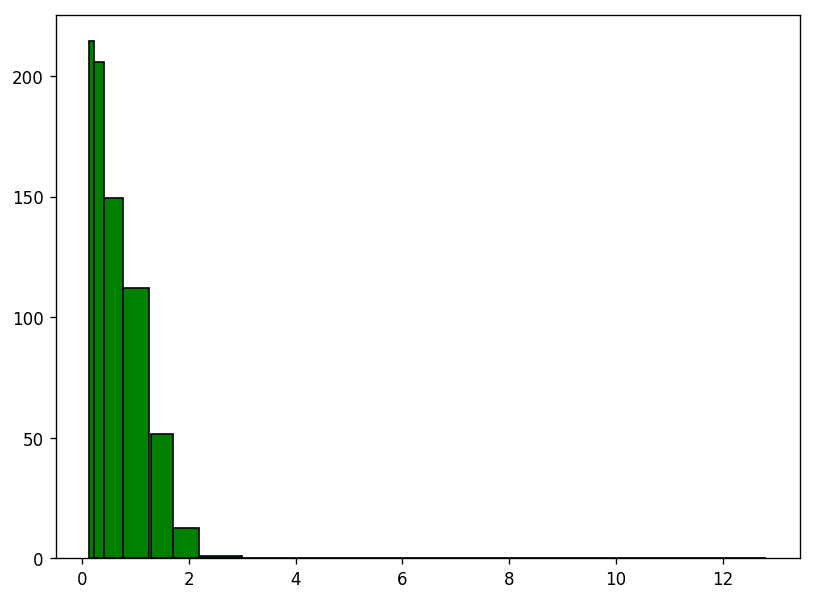

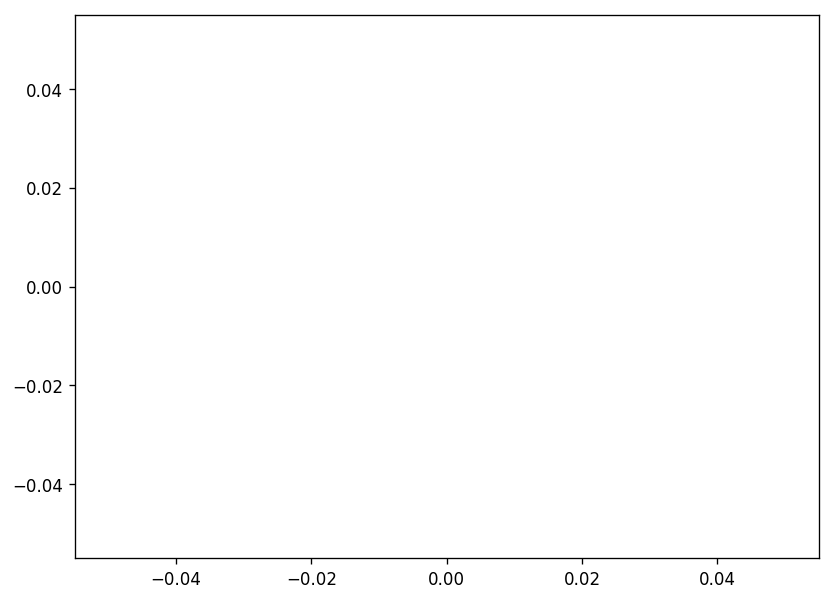

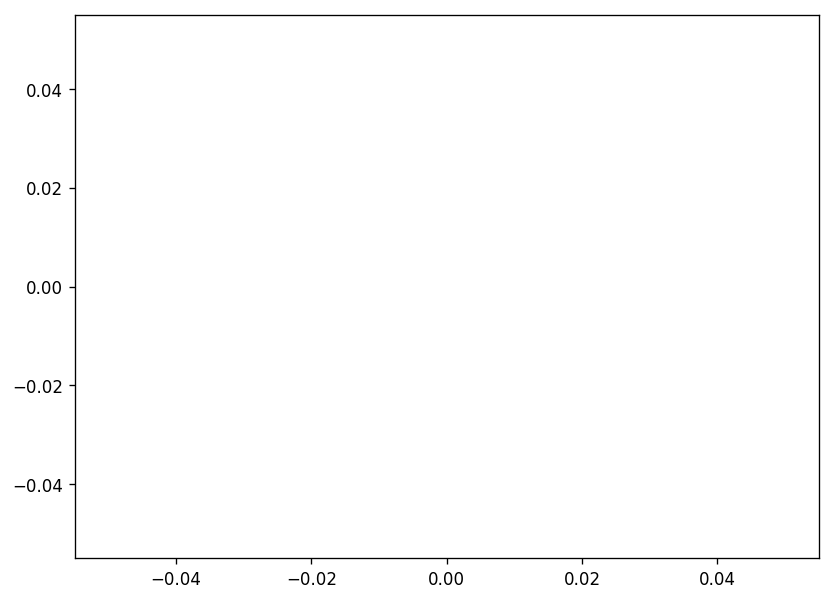

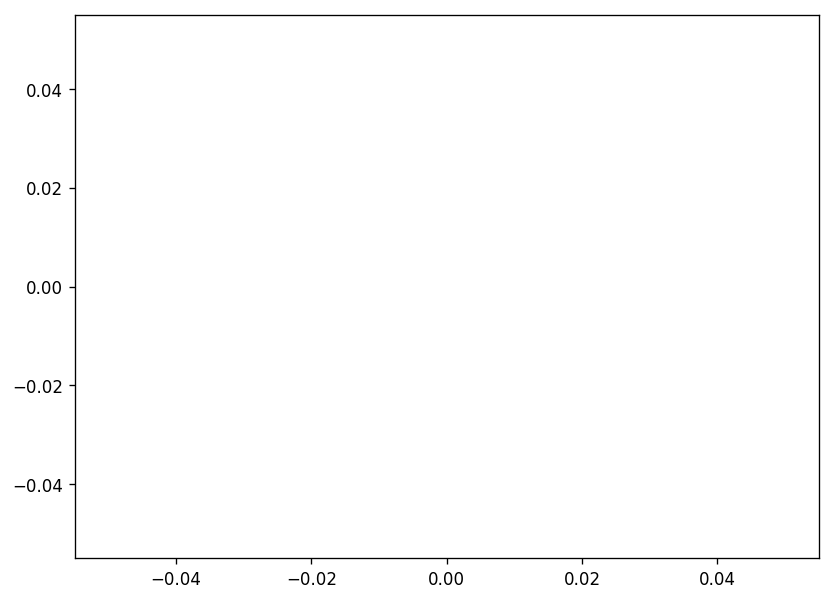

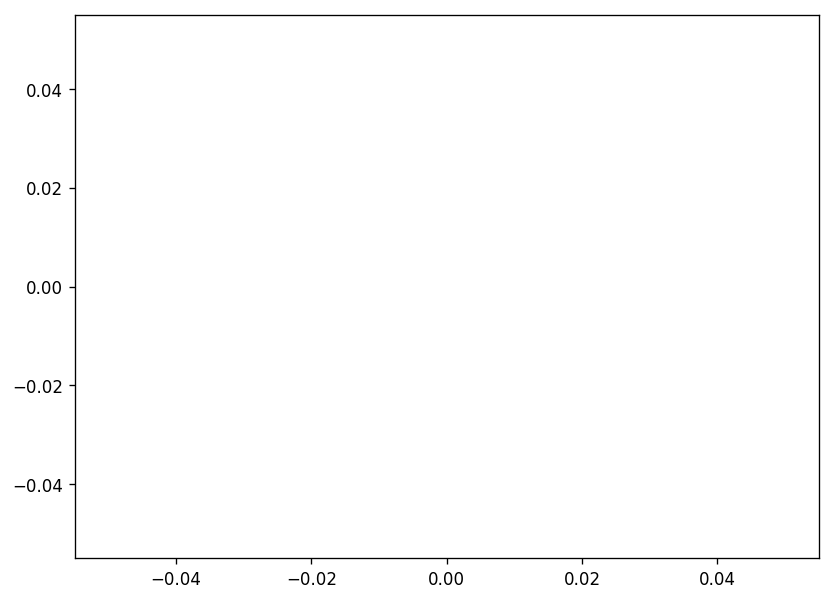

In [18]:
L_s = 'L_shell'
e_count = 'rate_electron_measured'
p_count = 'rate_proton_measured'


for fn in new_list:
    dec = '====================' + fn 
    print dec
    day = out[fn]['decimal_day']
    x =  out[fn][L_s]
    tmp = out[fn][p_count]
    tme = out[fn][e_count]
    e_bc = np.array_split(out[fn]['electron_background'], range(len(out[fn]['electron_background'][0])), axis = 1)
    p_bc = np.array_split(out[fn]['proton_background'], range(len(out[fn]['proton_background'][0])), axis = 1)
    #print tmp[0]
    p_eng = np.array_split(tmp, range(len(tmp[0])), axis = 1)
    e_eng = np.array_split(tme, range(len(tme[0])), axis = 1)    
    #colour = ['rosybrown', 'blue', 'red', 'green', 'magenta', 'navy', 'aqua', 'orange', 'yellow' , 'lime', 'peru', 'slategrey', 'teal', 'maroon', 'mediumspringgreen']
    fig = plt.figure(figsize=(8, 6), dpi=120)
    ax = fig.add_subplot(111)
    #plt.xlim(xmin = 3.8, xmax = 12)
    e_key_list = [0.14, 0.23, 0.41, 0.77, 1.26,  1.3, 1.7, 2.2, 3.0, 4.1, 5.8]
    e_width_ls = [0.09, 0.18, 0.36, 0.49, 66.74, 0.4, 0.5, 0.8, 1.1, 1.7, 7.0]
    
    for d in range(7):
        fig = plt.figure(figsize=(8, 6), dpi=120)
        ax = fig.add_subplot(111)
        for i in range(len(tme[0])):
            bin_data = []
            if i == 4:
                continue
            #print i
            for j in range(len(e_eng[i+1])):
                if 4.2 <= x[j] <= 5 and int(day[0])+d == int(day[j]):
                    bin_data.append(e_eng[i+1][j] - e_bc[i+1][j])
                       
            bin_data = np.array(bin_data)
            ax.bar(e_key_list[i], np.mean(bin_data), color ='g', width = e_width_ls[i], edgecolor = 'k', align ='edge')
        plt.show()


====================ns54_140209


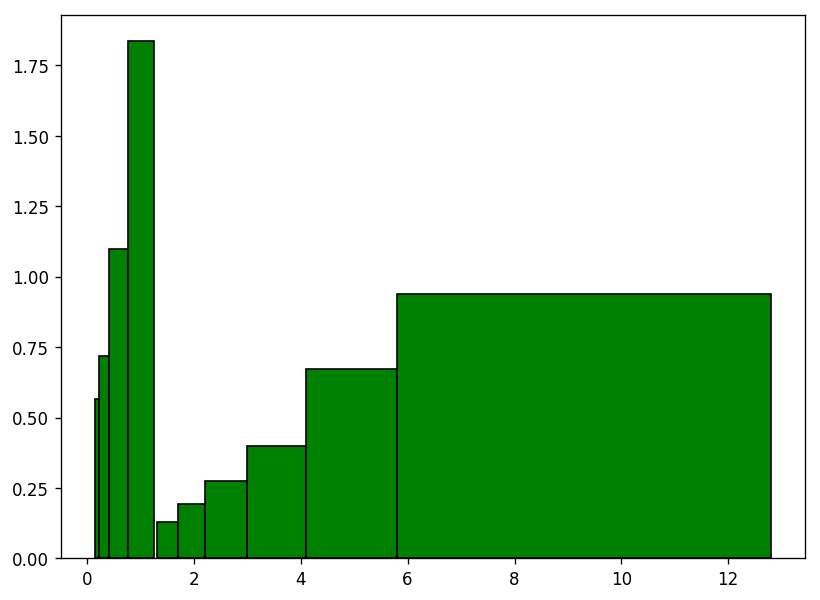

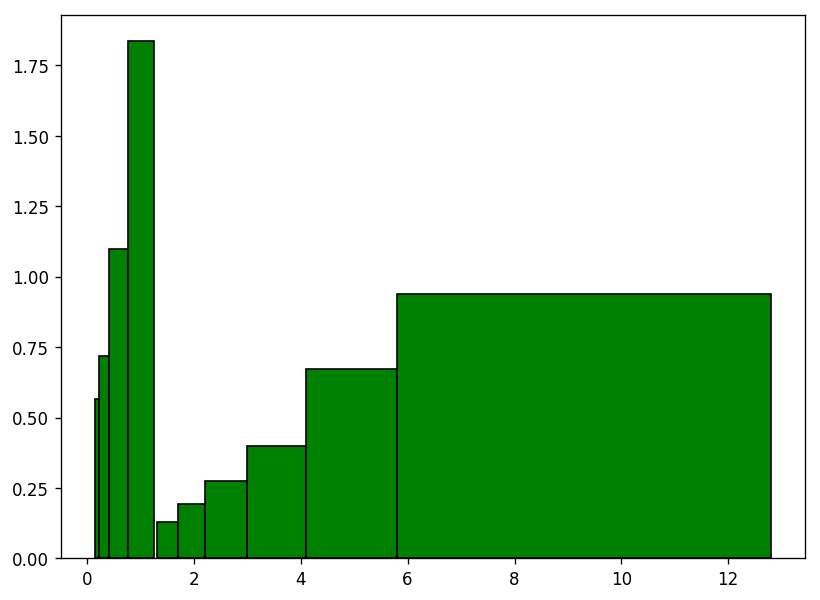

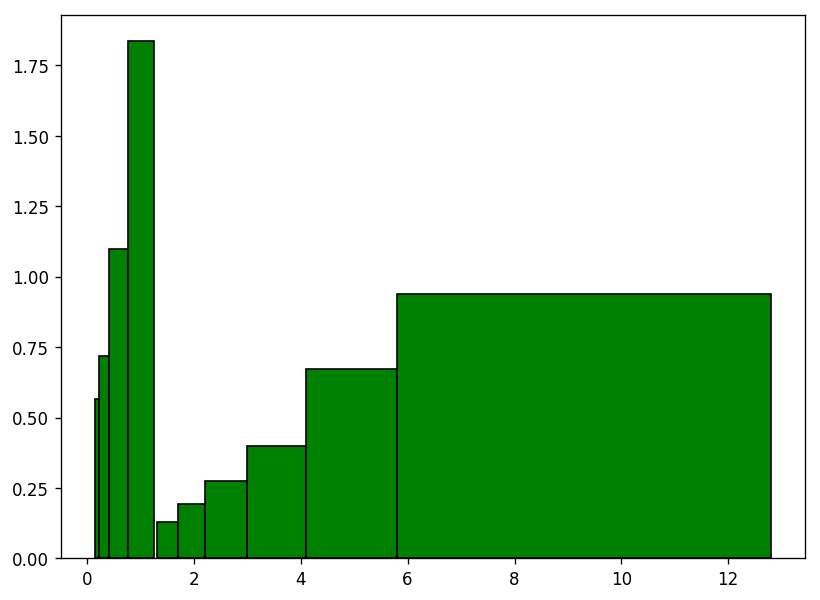

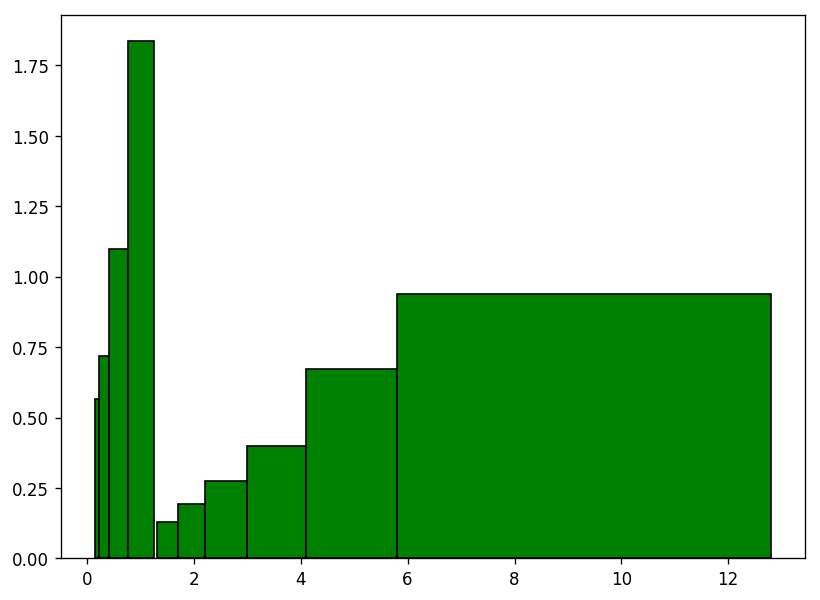

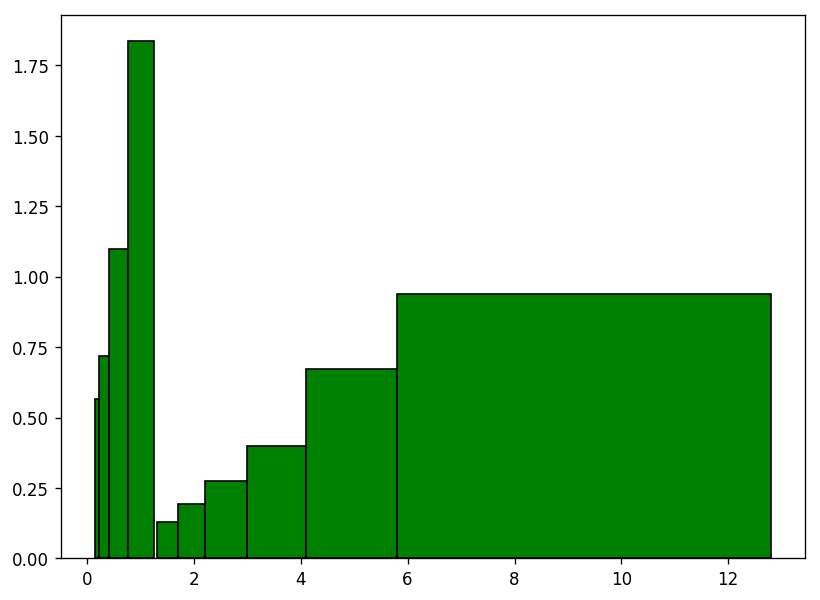

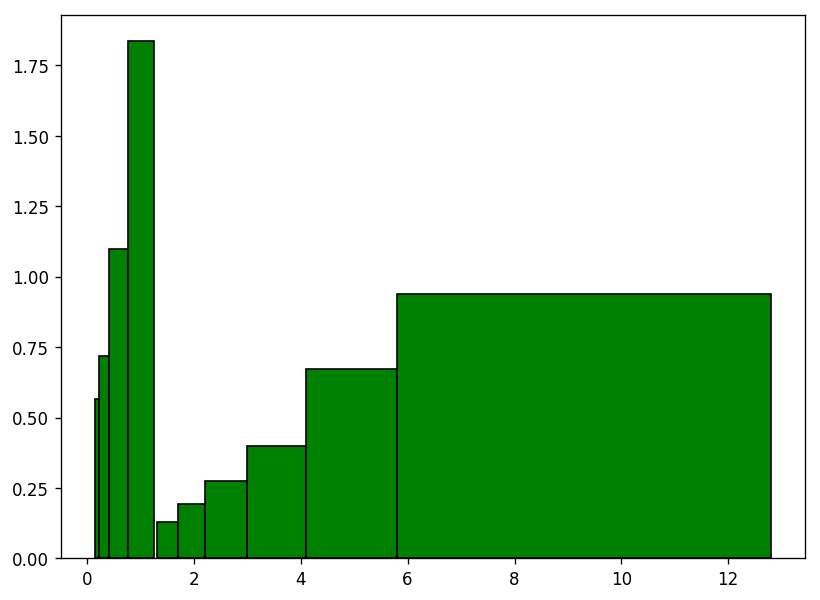

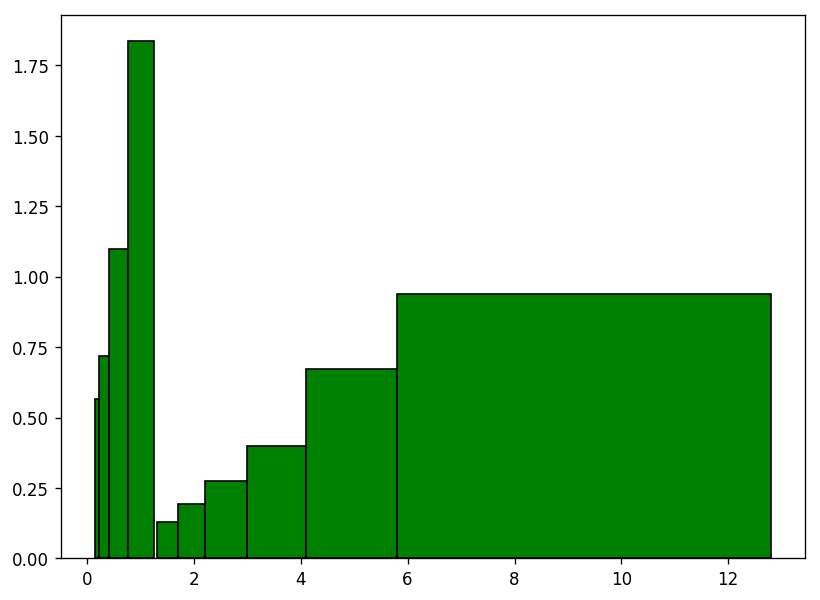

====================ns54_140216


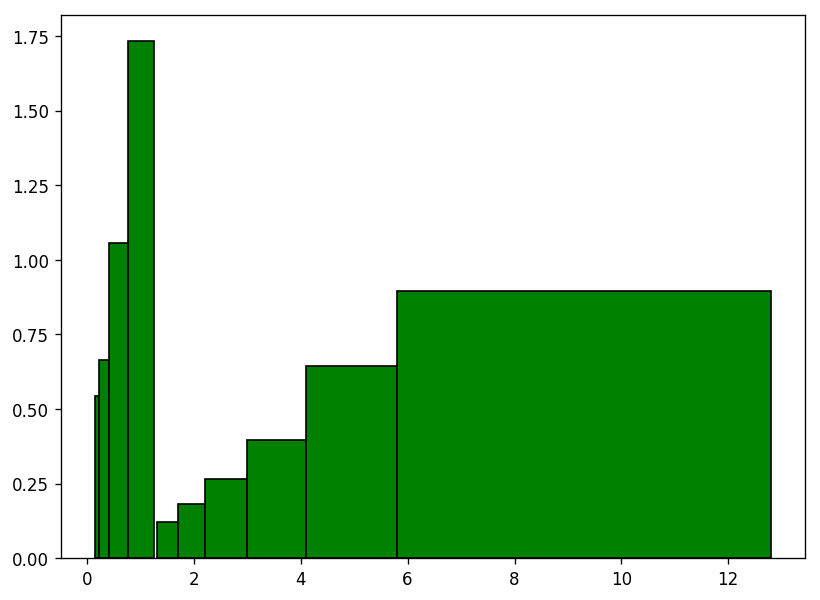

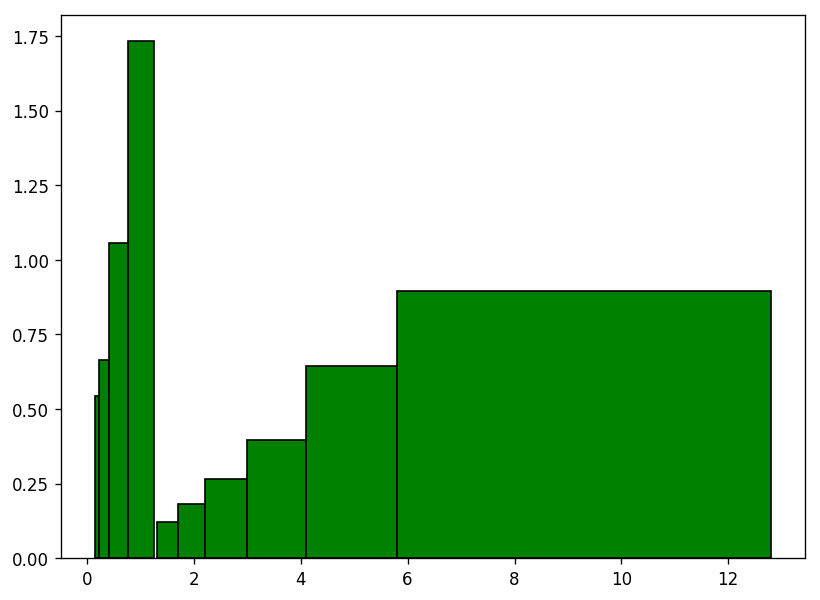

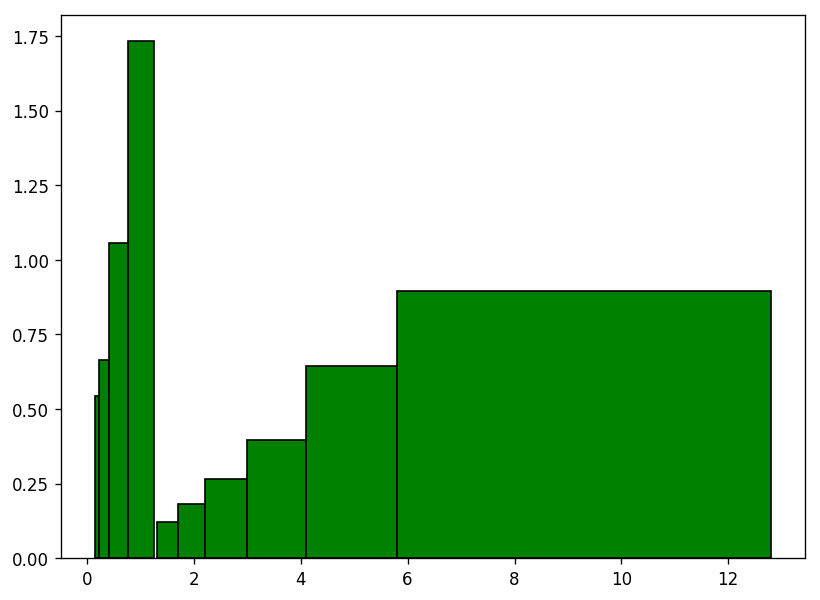

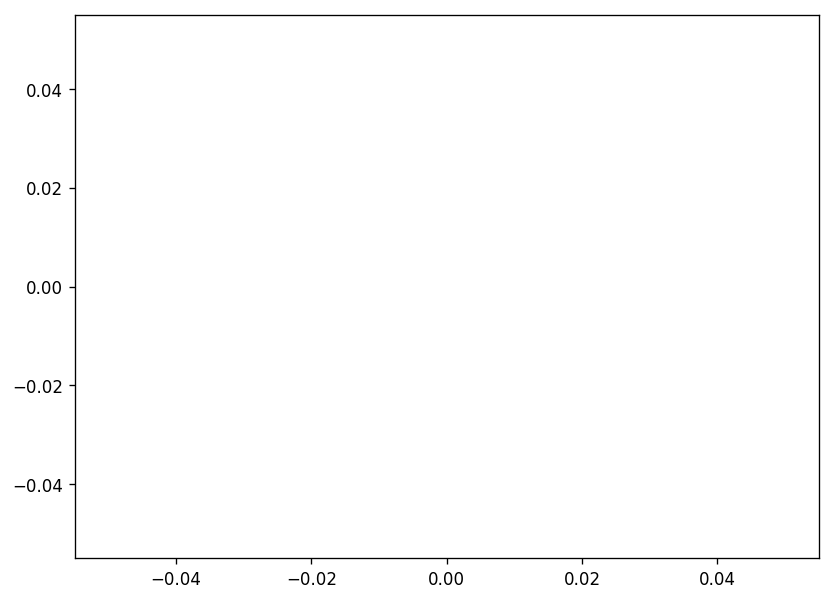

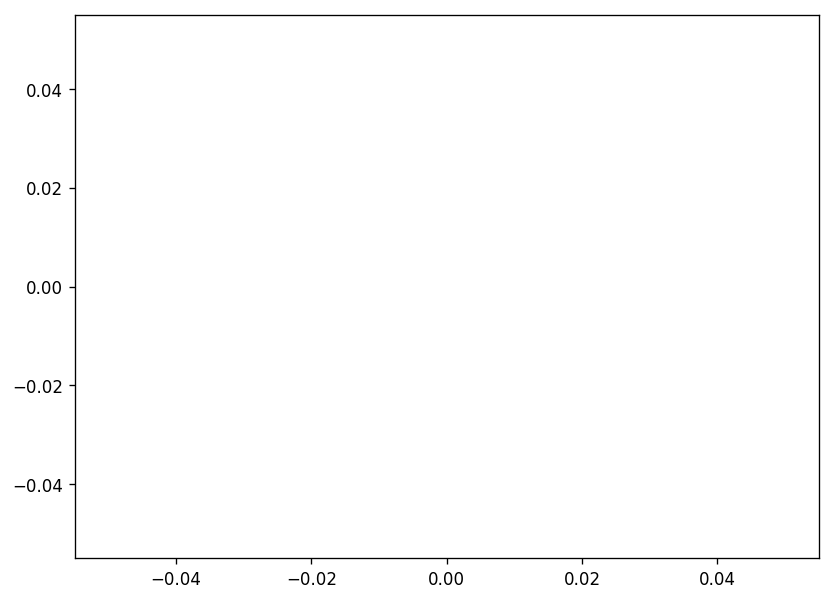

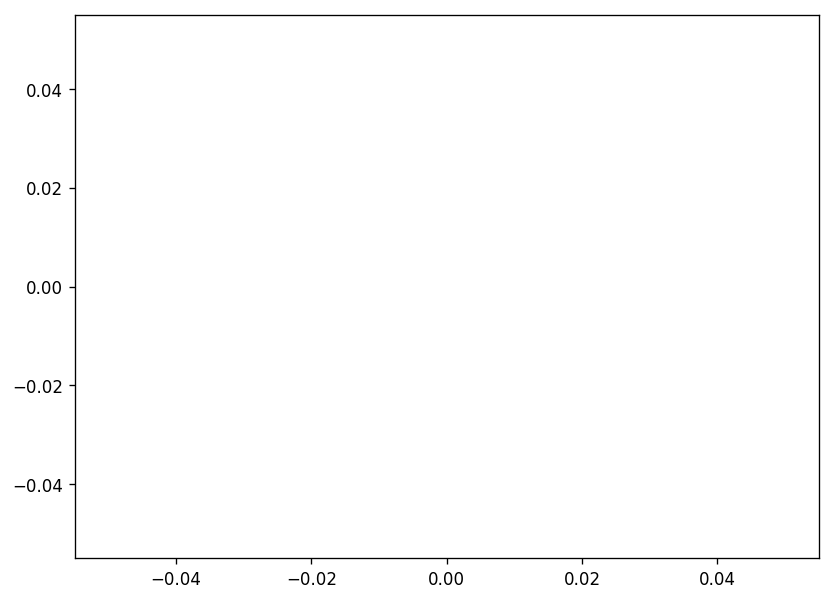

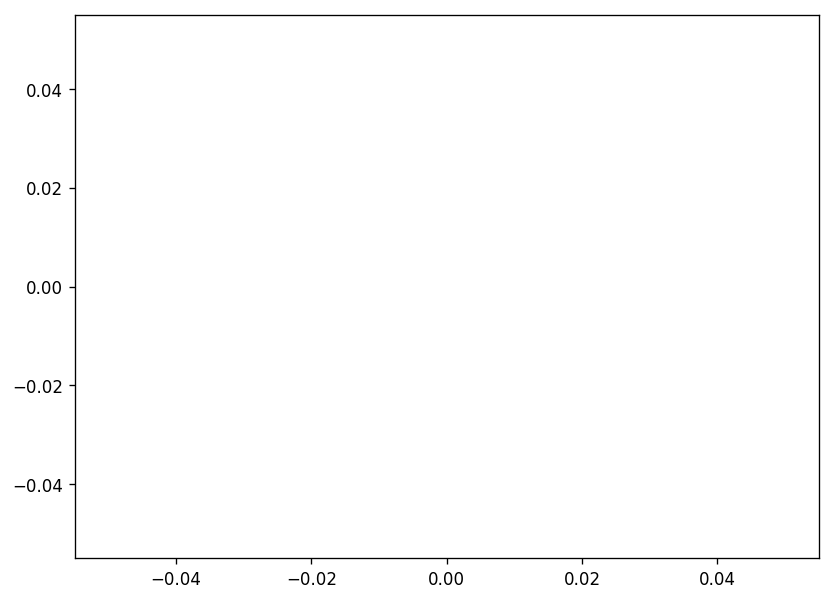

In [23]:
L_s = 'L_shell'
e_count = 'rate_electron_measured'
p_count = 'rate_proton_measured'


for fn in new_list:
    dec = '====================' + fn 
    print dec
    day = out[fn]['decimal_day']
    x =  out[fn][L_s]
    tmp = out[fn][p_count]
    tme = out[fn][e_count]
    e_bc = np.array_split(out[fn]['electron_background'], range(len(out[fn]['electron_background'][0])), axis = 1)
    p_bc = np.array_split(out[fn]['proton_background'], range(len(out[fn]['proton_background'][0])), axis = 1)
    #print tmp[0]
    p_eng = np.array_split(tmp, range(len(tmp[0])), axis = 1)
    e_eng = np.array_split(tme, range(len(tme[0])), axis = 1)    
   
    e_key_list = [0.14, 0.23, 0.41, 0.77, 1.26,  1.3, 1.7, 2.2, 3.0, 4.1, 5.8]
    e_width_ls = [0.09, 0.18, 0.36, 0.49, 66.74, 0.4, 0.5, 0.8, 1.1, 1.7, 7.0]
    
    for d in range(7):
        fig = plt.figure(figsize=(8, 6), dpi=120)
        ax = fig.add_subplot(111)
        for i in range(len(tme[0])):
            bin_data = []
            if i == 4:
                continue
            #print i
            for j in range(len(e_bc[i+1])):
                if 4.2 <= x[j] <= 5 and int(day[0])+d == int(day[j]):
                    bin_data.append(e_bc[i+1][j])
                       
            bin_data = np.array(bin_data)
            ax.bar(e_key_list[i], np.mean(bin_data), color ='g', width = e_width_ls[i], edgecolor = 'k', align ='edge')
        plt.show()